In [1]:
import sys
import pickle
sys.path.append('../..')
import pandas as pd
import matplotlib.pyplot as plt
from lstm import transf_chik_pred
from lstm import apply_dengue_chik
from preprocessing import get_nn_data
from lstm import build_model, transf_chik_pred
from pgbm_model import  cross_dengue_chik_prediction
import matplotlib.dates as mdates
from plots_pgbm import predicted_vs_observed as p_o_pgbm
from plots_lstm import predicted_vs_observed as p_o_lstm
fmt = mdates.DateFormatter('%d-%b\n%Y')

In [2]:
CITY = 3304557
CITY_NAME = 'Rio de Janeiro'
STATE = 'RJ'
FILENAME_DATA = f'../../data/chik_{CITY}_cluster.csv'

In [3]:
df_chik = pd.read_csv(FILENAME_DATA, index_col = 'Unnamed: 0' )
df_chik.index = pd.to_datetime(df_chik.index)
df_chik

,casos_3303203,casos_est_3303203,casos_est_min_3303203,casos_est_max_3303203,p_rt1_3303203,p_inc100k_3303203,temp_min_3303203,temp_max_3303203,umid_min_3303203,pressao_min_3303203,...,casos_3304557,casos_est_3304557,casos_est_min_3304557,casos_est_max_3304557,p_rt1_3304557,p_inc100k_3304557,temp_min_3304557,temp_max_3304557,umid_min_3304557,pressao_min_3304557
2010-01-03,0,0.0,0,0,0.0,0.0,24.333333,33.000000,42.000000,1009.666667,...,0,0.0,0,0,0.000000,0.000000,24.333333,33.000000,42.000000,1009.666667
2010-01-10,0,0.0,0,0,0.0,0.0,25.428571,34.000000,43.285714,1008.000000,...,0,0.0,0,0,0.000000,0.000000,25.428571,34.000000,43.285714,1008.000000
2010-01-17,0,0.0,0,0,0.0,0.0,24.142857,34.000000,43.857143,1010.285714,...,0,0.0,0,0,0.000000,0.000000,24.142857,34.000000,43.857143,1010.285714
2010-01-24,0,0.0,0,0,0.0,0.0,23.714286,34.285714,39.285714,1009.000000,...,0,0.0,0,0,0.000000,0.000000,23.714286,34.285714,39.285714,1009.000000
2010-01-31,0,0.0,0,0,0.0,0.0,23.857143,33.857143,41.285714,1009.857143,...,0,0.0,0,0,0.000000,0.000000,23.857143,33.857143,41.285714,1009.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-27,0,0.0,0,0,0.5,0.0,21.142857,27.000000,64.119624,1010.000000,...,8,9.0,8,12,0.476076,0.133377,21.142857,27.000000,64.119624,1010.000000
2022-12-04,0,0.0,0,0,0.5,0.0,23.000000,30.571429,60.802093,1006.000000,...,9,11.0,9,14,0.588996,0.163016,23.000000,30.571429,60.802093,1006.000000
2022-12-11,0,0.0,0,0,0.5,0.0,22.142857,29.142857,60.530664,1008.285714,...,14,17.0,14,22,0.900819,0.251933,22.142857,29.142857,60.530664,1008.285714
2022-12-18,0,0.0,0,0,0.5,0.0,20.833333,28.833333,53.115433,1007.000000,...,3,8.0,3,15,0.193542,0.118557,20.833333,28.833333,53.115433,1007.000000


<AxesSubplot:>

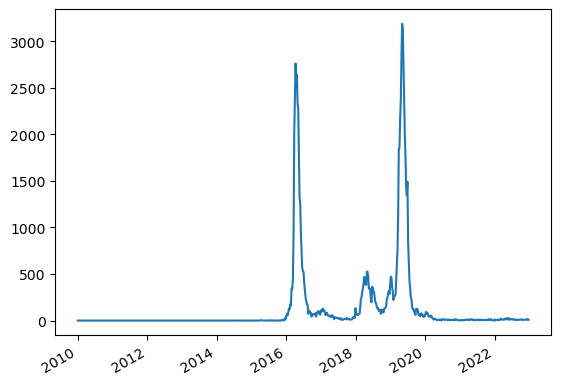

In [4]:
df_chik[f'casos_est_{CITY}'].plot()

In [5]:
INI_DATE = '2015-11-01'
END_DATE = '2022-07-01'

PREDICT_N = 4 # number of new days predicted
LOOK_BACK = 4 # number of last days used to make the prediction 
EPOCHS = 400
HIDDEN = 8
FEAT = 65 # number of features 

Apply the dengue model:

2023-03-11 20:01:33.900145: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


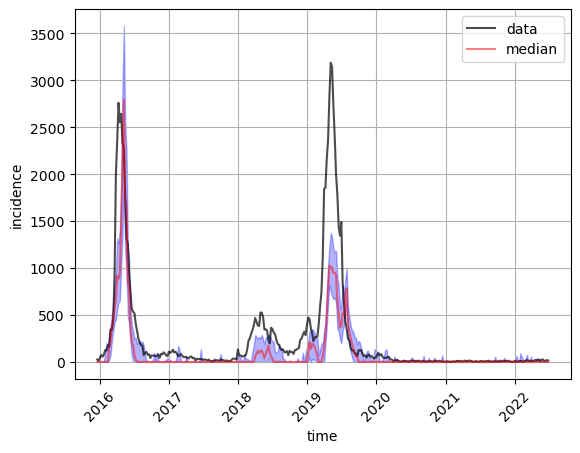

In [6]:
metrics = apply_dengue_chik(CITY, ini_date = INI_DATE, 
                         end_date = END_DATE, look_back = LOOK_BACK,
                         predict_n = PREDICT_N,  label_m = f'msle_all', filename = FILENAME_DATA )

Applying the **transfer learning** techinique:

- Using the model trained with `loss = 'msle'`:


Compilation Time :  0.006654977798461914
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4, 65)]           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 4, 8)             4736      
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 4, 8)              0         
                                                                 
 lstm_1 (LSTM)               (None, 8)                 544       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
   

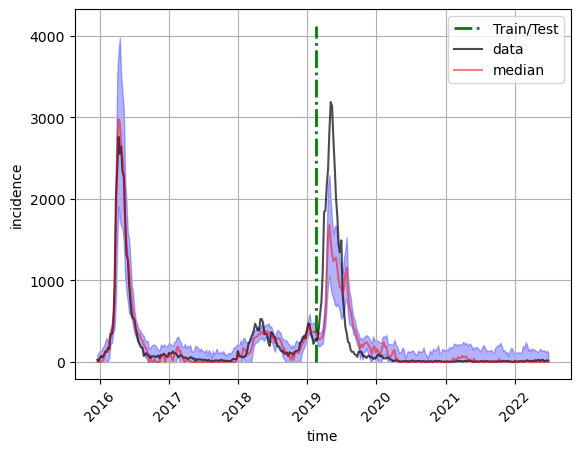

In [7]:

END_DATE_TRAIN = f'2019-02-10'

model = build_model(hidden = HIDDEN, features = FEAT, predict_n = PREDICT_N, look_back=LOOK_BACK, batch_size=1, loss = 'msle')

    
m_msle, m_t, m_val = transf_chik_pred(model, CITY, ini_date = INI_DATE, end_train_date = END_DATE_TRAIN,  
                                end_date = END_DATE, filename = f'../../saved_models/lstm/trained_{CITY}_model_msle_all.h5',  epochs= EPOCHS, features = FEAT,  
                                predict_n = PREDICT_N, look_back = LOOK_BACK, loss = 'msle' , validation_split = 0.0,
                                label = f'transf_msle',  filename_data = FILENAME_DATA )

Apply the pgbm model:

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


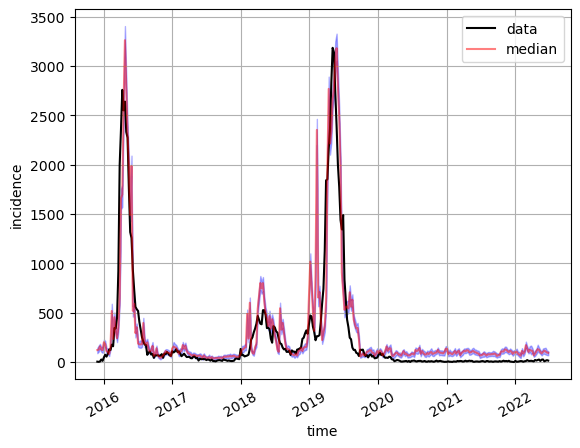

In [8]:
preds, preds25, preds975, X_data, targets = cross_dengue_chik_prediction(CITY, STATE, predict_n = PREDICT_N, look_back = LOOK_BACK, ini_date = INI_DATE, end_date = END_DATE,  filename = FILENAME_DATA)
    